In [13]:
import folium as fo
from flask import Flask
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from folium.plugins import HeatMap
import numpy as np
import time
from scipy import ndimage
import matplotlib.pyplot as plt

   
app = Flask(__name__)

map = fo.Map(location=[39.2858, -76.6131], tiles='cartodbdark_matter')
map.save('/home/mapper/Documents/Python/Baltimore/Maps/test.html')
map

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;base64,CiAgICAgICAgPCFET0NUWVBFIGh0bWw+CiAgICAgICAgPGhlYWQ+CiAgICAgICAgICAgIAogICAgICAgIAogICAgICAgICAgICA8bWV0YSBodHRwLWVxdWl2PSJjb250ZW50LXR5cGUiIGNvbnRlbnQ9InRleHQvaHRtbDsgY2hhcnNldD1VVEYtOCIgLz4KICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0LzAuNy4zL2xlYWZsZXQuanMiPjwvc2NyaXB0PgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vYWpheC5nb29nbGVhcGlzLmNvbS9hamF4L2xpYnMvanF1ZXJ5LzEuMTEuMS9qcXVlcnkubWluLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9qcy9ib290c3RyYXAubWluLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5taW4uanMiPjwvc2NyaXB0PgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL2xlYWZsZXQubWFya2VyY2x1c3Rlci8wLjQuMC9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXItc3JjLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXIvMC40LjAvbGVhZmxldC5tYXJrZXJjbHVzdGVyLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvbGVhZmxldC8wLjcuMy9sZWFmbGV0LmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICAgICAgCiAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIAogICAgICAgIAogICAgICAgICAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuMS4wL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXIvMC40LjAvTWFya2VyQ2x1c3Rlci5EZWZhdWx0LmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvbGVhZmxldC5tYXJrZXJjbHVzdGVyLzAuNC4wL01hcmtlckNsdXN0ZXIuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhdy5naXRodWJ1c2VyY29udGVudC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAgICAgPHN0eWxlPgoKICAgICAgICAgICAgaHRtbCwgYm9keSB7CiAgICAgICAgICAgICAgICB3aWR0aDogMTAwJTsKICAgICAgICAgICAgICAgIGhlaWdodDogMTAwJTsKICAgICAgICAgICAgICAgIG1hcmdpbjogMDsKICAgICAgICAgICAgICAgIHBhZGRpbmc6IDA7CiAgICAgICAgICAgICAgICB9CgogICAgICAgICAgICAjbWFwIHsKICAgICAgICAgICAgICAgIHBvc2l0aW9uOmFic29sdXRlOwogICAgICAgICAgICAgICAgdG9wOjA7CiAgICAgICAgICAgICAgICBib3R0b206MDsKICAgICAgICAgICAgICAgIHJpZ2h0OjA7CiAgICAgI

In [2]:
def topandas_argus(filename):

    """
      This function parses the information from the header rows of the .arg file and saves it into a 'defaultdict',
      and generates 'skiprow' list for pandas.read_csv()'. It breaks after parsing the header, so the data block will no
      be read into memory.

      returns: parsed header info as defaultdict object, and skipped rows list

    """

    # useful header information that will be saved into a list

    with open(filename) as f:
        header = []
        i = 0
        skip = []
        for line in f:
                line = line.strip()
                if line.startswith('DATA'):
                    skip.append(i)
                    break
                else:
                    skip.append(i)
                    header.append(line)
                i = i+1

    # Create a pandas dataframe with header and footer removed

    argusdata = pd.read_csv(filename, engine='python', header=None, skiprows=skip, skipfooter=2)
    argusdata = pd.DataFrame(argusdata)
    argusdata.columns = ['Date', 'Time', 'Lat', 'Long', 'Speed', 'Depth', 'StaticDraft', 'VesselID']
    argusdata[['Long', 'Lat']] = argusdata[['Long', 'Lat']].astype(float)

    return argusdata

argus_data = topandas_argus('/home/mapper/Documents/Python/Baltimore/BaltimoreData/ArgusData/2014-05-29_ARGUS_Baltimore.arg')   


In [3]:
def to_geopandas(pandas_df):

    """
      Creates a GeoDataFrame from a pandas dataframe

    """

    geometry = [Point(xy) for xy in zip(pandas_df.Long, pandas_df.Lat)]
    pandas_df = pandas_df.drop(['Long', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}
    geo_df = GeoDataFrame(pandas_df, crs=crs, geometry=geometry)
    return geo_df

geo_df = to_geopandas(argus_data)
geo_df_small = geo_df[:100]

In [4]:
print(geo_df_small)

          Date      Time  Speed  Depth  StaticDraft           VesselID  \
0   2012-10-27  23:23:18    7.4   10.0          1.0     16F - Catenary   
1   2013-05-18  22:04:00    6.2   14.3          1.0     16F - Catenary   
2   2013-05-18  21:39:49    8.9   15.4          1.0     16F - Catenary   
3   2011-07-06  22:23:15   20.8   15.6          1.0  B98 - Annapolis 4   
4   2010-11-13  18:55:27    8.5   17.8          1.0  B98 - Annapolis 4   
5   2011-07-04  19:03:45    4.6   16.6          1.0  B98 - Annapolis 4   
6   2012-07-05  20:52:03    8.7   16.7          1.0     16F - Catenary   
7   2011-07-04  19:03:23    1.6   16.7          1.0  B98 - Annapolis 4   
8   2011-07-04  19:03:21    1.5   16.9          1.0  B98 - Annapolis 4   
9   2011-07-04  19:03:22    1.6   16.7          1.0  B98 - Annapolis 4   
10  2011-07-04  19:03:19    1.2   16.7          1.0  B98 - Annapolis 4   
11  2013-04-22  13:15:30    8.3   21.8          2.0       C7C - Altair   
12  2012-10-27  22:09:15    6.0   10.7

In [5]:
def to_geojson(geo_df):
    geo_json = geo_df.to_json()
    return geo_json


geo_json = to_geojson(geo_df_small)


In [6]:
print(geo_json)


{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Date": "2012-10-27", "Time": "23:23:18", "Speed": 7.4, "Depth": 10.0, "StaticDraft": 1.0, "VesselID": "16F - Catenary"}, "geometry": {"type": "Point", "coordinates": [-76.586067, 39.170017]}}, {"id": "1", "type": "Feature", "properties": {"Date": "2013-05-18", "Time": "22:04:00", "Speed": 6.2, "Depth": 14.3, "StaticDraft": 1.0, "VesselID": "16F - Catenary"}, "geometry": {"type": "Point", "coordinates": [-76.51705, 39.170017]}}, {"id": "2", "type": "Feature", "properties": {"Date": "2013-05-18", "Time": "21:39:49", "Speed": 8.9, "Depth": 15.4, "StaticDraft": 1.0, "VesselID": "16F - Catenary"}, "geometry": {"type": "Point", "coordinates": [-76.459683, 39.170017]}}, {"id": "3", "type": "Feature", "properties": {"Date": "2011-07-06", "Time": "22:23:15", "Speed": 20.8, "Depth": 15.6, "StaticDraft": 1.0, "VesselID": "B98 - Annapolis 4"}, "geometry": {"type": "Point", "coordinates": [-76.45791700000001, 

In [7]:
points = fo.features.GeoJson(geo_json)
cluster = fo.MarkerCluster().add_to(map)
map.add_children(points)
map.save('/home/mapper/Documents/Python/Baltimore/Maps/test.html')
map


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;base64,CiAgICAgICAgPCFET0NUWVBFIGh0bWw+CiAgICAgICAgPGhlYWQ+CiAgICAgICAgICAgIAogICAgICAgIAogICAgICAgICAgICA8bWV0YSBodHRwLWVxdWl2PSJjb250ZW50LXR5cGUiIGNvbnRlbnQ9InRleHQvaHRtbDsgY2hhcnNldD1VVEYtOCIgLz4KICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0LzAuNy4zL2xlYWZsZXQuanMiPjwvc2NyaXB0PgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vYWpheC5nb29nbGVhcGlzLmNvbS9hamF4L2xpYnMvanF1ZXJ5LzEuMTEuMS9qcXVlcnkubWluLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9qcy9ib290c3RyYXAubWluLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5taW4uanMiPjwvc2NyaXB0PgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL2xlYWZsZXQubWFya2VyY2x1c3Rlci8wLjQuMC9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXItc3JjLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXIvMC40LjAvbGVhZmxldC5tYXJrZXJjbHVzdGVyLmpzIj48L3NjcmlwdD4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvbGVhZmxldC8wLjcuMy9sZWFmbGV0LmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICAgICAgCiAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIAogICAgICAgIAogICAgICAgICAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuMS4wL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9sZWFmbGV0Lm1hcmtlcmNsdXN0ZXIvMC40LjAvTWFya2VyQ2x1c3Rlci5EZWZhdWx0LmNzcyIgLz4KICAgICAgICAKICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgCiAgICAgICAgCiAgICAgICAgICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvbGVhZmxldC5tYXJrZXJjbHVzdGVyLzAuNC4wL01hcmtlckNsdXN0ZXIuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAKICAgICAgICAgICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhdy5naXRodWJ1c2VyY29udGVudC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgICAgIAogICAgICAgIAogICAgICAgIAogICAgICAgICAgICAKICAgICAgICAgICAgPHN0eWxlPgoKICAgICAgICAgICAgaHRtbCwgYm9keSB7CiAgICAgICAgICAgICAgICB3aWR0aDogMTAwJTsKICAgICAgICAgICAgICAgIGhlaWdodDogMTAwJTsKICAgICAgICAgICAgICAgIG1hcmdpbjogMDsKICAgICAgICAgICAgICAgIHBhZGRpbmc6IDA7CiAgICAgICAgICAgICAgICB9CgogICAgICAgICAgICAjbWFwIHsKICAgICAgICAgICAgICAgIHBvc2l0aW9uOmFic29sdXRlOwogICAgICAgICAgICAgICAgdG9wOjA7CiAgICAgICAgICAgICAgICBib3R0b206MDsKICAgICAgICAgICAgICAgIHJpZ2h0OjA7CiAgICAgI

/home/mapper/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


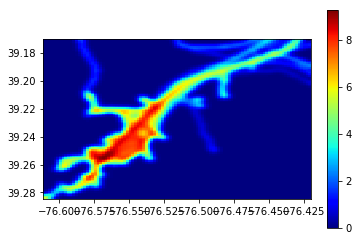

In [ ]:
# @app.route('/home/mapper/Documents/Python/Baltimore/Maps/test.html')
# def show_map():
#     return flask.send_file('/home/mapper/Documents/Python/Baltimore/Maps/test.html')


/home/mapper/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


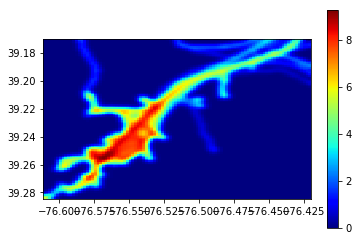

In [ ]:
def simplexy(dataframe):
    start = time.time()
    dataframe.plot(color='green', markersize=1)
    end = time.time()
    print(end-start)

simplexy(geo_df)    


/home/mapper/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log


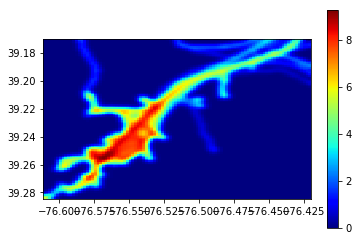

In [14]:
def simple_heatmap(dataframe, bins=(100, 100), smoothing=1.3, cmap='jet'):

    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(dataframe.geometry.apply(getx))
    y = list(dataframe.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')

    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.show()
    
simple_heatmap(geo_df, bins=100, smoothing=1.3, cmap='jet')    
